In [3]:
from collections import defaultdict  
  
class Graph:  
    def __init__(self):  
        self.graph = defaultdict(list)  
  
    def add_edge(self, u, v):  
        self.graph[u].append(v)  
  
    def iddfs(self, start, goal, max_depth):  
        for depth in range(max_depth+1):  
            visited = set()  
            if self.dls(start, goal, depth, visited):  
                return True  
        return False  
  
    def dls(self, node, goal, depth, visited):  
        if node == goal:  
            return True  
        if depth == 0:  
            return False  
        visited.add(node)  
        for neighbor in self.graph[node]:  
            if neighbor not in visited:  
                if self.dls(neighbor, goal, depth-1, visited):  
                    return True  
        return False  
  
# Example usage  
g = Graph()  
g.add_edge(0, 1)  
g.add_edge(0, 2)  
g.add_edge(1, 2)  
g.add_edge(2, 0)  
g.add_edge(2, 3)  
g.add_edge(3, 3)  
  
start = 0  
goal = 5 
max_depth = 4 
if g.iddfs(start, goal, max_depth):  
    print("Path found")  
else:  
    print("Path not found")  

Path not found


Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (6, 7), (6, 6), (7, 6), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)]


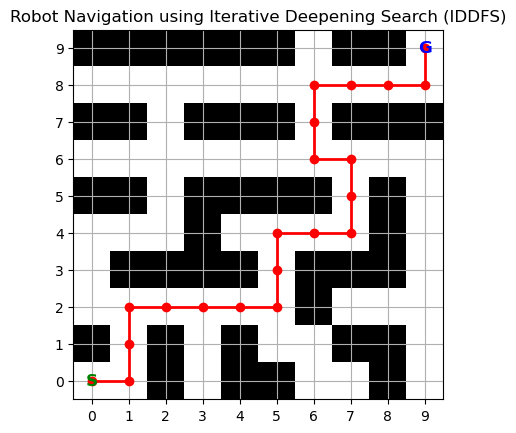

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define directions for robot movement (up, down, left, right)
DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Utility to check if a position is within bounds and not an obstacle
def is_valid(grid, position):
    x, y = position
    if 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 1:
        return True
    return False

# Iterative Deepening Depth-First Search (IDDFS) Implementation
def iddfs(grid, start, goal):
    def dls(node, depth, path):
        if node == goal:
            return path
        if depth == 0:
            return None
        for direction in DIRECTIONS:
            new_x, new_y = node[0] + direction[0], node[1] + direction[1]
            next_node = (new_x, new_y)
            if is_valid(grid, next_node) and next_node not in path:
                result = dls(next_node, depth - 1, path + [next_node])
                if result:
                    return result
        return None

    depth = 0
    while True:
        result = dls(start, depth, [start])
        if result:
            return result
        depth += 1

# Create a more complex grid (0: open space, 1: obstacle)
grid = [
    [0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
]

start = (0, 0)  # Starting position of the robot
goal = (9, 9)   # Goal position

# Perform IDDFS
path = iddfs(grid, start, goal)
print("Path found:", path)

# Visualization Code
def visualize_path(grid, path):
    grid_size = (len(grid), len(grid[0]))
    grid_visual = np.array(grid)
    
    # Plot grid with obstacles
    plt.imshow(grid_visual, cmap='binary', origin='upper')

    # Highlight the path with a red line
    path_x = [x for x, y in path]
    path_y = [y for x, y in path]
    plt.plot(path_y, path_x, color='red', linewidth=2, marker='o')

    # Mark start and goal
    plt.text(start[1], start[0], 'S', fontsize=12, ha='center', va='center', color='green', fontweight='bold')
    plt.text(goal[1], goal[0], 'G', fontsize=12, ha='center', va='center', color='blue', fontweight='bold')

    # Grid labels and layout
    plt.grid(True)
    plt.xticks(range(grid_size[1]))
    plt.yticks(range(grid_size[0]))
    plt.gca().invert_yaxis()  # To align origin at top-left corner like a typical grid

    plt.title("Robot Navigation using Iterative Deepening Search (IDDFS)")
    plt.show()

# Visualize the result
visualize_path(grid, path)
